<a href="https://colab.research.google.com/github/cagBRT/SentimentTextAnalysis/blob/master/NLP_Universal_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing using Universsal Studio Reviews

In [21]:
# Clone the entire repo.
%cd /content/
!git clone  https://github.com/cagBRT/SentimentTextAnalysis.git cloned-repo
%cd cloned-repo

/content
fatal: destination path 'cloned-repo' already exists and is not an empty directory.
/content/cloned-repo


Universal Studio gets a vast amount of reviews from visitors. To go through all the reviews can be a tedious job. <br>

We have to categorize reviews expressed. We determine overall reviews based on individual comments.<br>

So that company can get a complete idea of reviews provided by visitors and can take care of those particular fields. This makes more loyal visitors to the company, increase business, fame, brand value, and also profit.

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


## Upload the dataset
<br>

**Step 1**<br>
go to https://www.kaggle.com/datasets/dwiknrd/reviewuniversalstudio/ and download the dataset

**Step 2**<br>

1. Go to the file icon on the left side menu
2. Click on the Upload file icon (top left)
3. Select the file from your uploads
    universal_studio_branches 2.csv
    

https://www.kaggle.com/datasets/dwiknrd/reviewuniversalstudio/


In [23]:
df = pd.read_csv("/content/universal_studio_branches.csv")
df

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida
...,...,...,...,...,...,...
50899,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore
50900,betty l,4.0,"March 29, 2010",Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore
50901,spoonos65,4.0,"March 28, 2010",Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore
50902,HeatSeekerWrexham_UK,4.0,"March 22, 2010",Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore


In [24]:
df['text'] = df['title'] + " " + df['review_text']
df

,reviewer,rating,written_date,title,review_text,branch,text
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,Universal is a complete Disaster - stick with ...
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,Food is hard to get. The food service is horri...
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,Disappointed I booked this vacation mainly to ...
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,My opinion When a person tries the test seat f...
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,"The Bourne Stuntacular...MUST SEE Ok, I can't ..."
...,...,...,...,...,...,...,...
50899,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,I'll Be Back Only If ... This is my first visi...
50900,betty l,4.0,"March 29, 2010",Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore,Universal Studios Singapore Experience We fina...
50901,spoonos65,4.0,"March 28, 2010",Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore,Impressive but not quite finished! We visited ...
50902,HeatSeekerWrexham_UK,4.0,"March 22, 2010",Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore,Small but beautifully marked We visited on the...


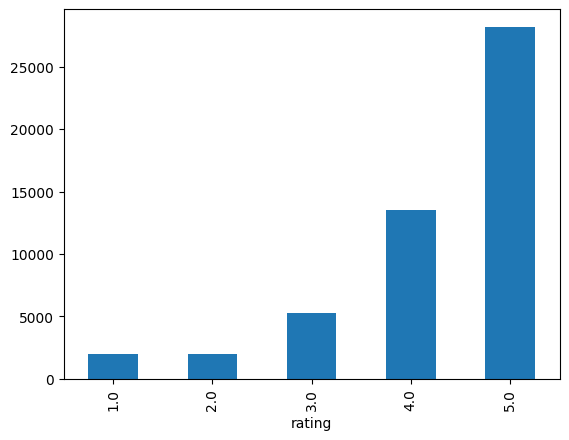

In [25]:
df.groupby('rating').text.count().plot.bar(ylim=0)
plt.show()

In [26]:
percentage_review=(df.rating.value_counts() / len(df.rating)) * 100
percentage_review


5.0    55.402326
4.0    26.548012
3.0    10.272277
2.0     3.901462
1.0     3.875923
Name: rating, dtype: float64

In [27]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
words = stopwords.words("english")

df['processed_text'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i)
for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
import string

#make all words lower case
df['processed_text'] = df['processed_text'].str.lower()

#Remove punctuation
table = str.maketrans('', '', string.punctuation)
df['processed_text'] = [df['processed_text'][row].translate(table) for row in range(len(df['processed_text']))]

# remove hash tags
df['processed_text'] = df['processed_text'].str.replace("#", " ")

#remove words less than 1 character
df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


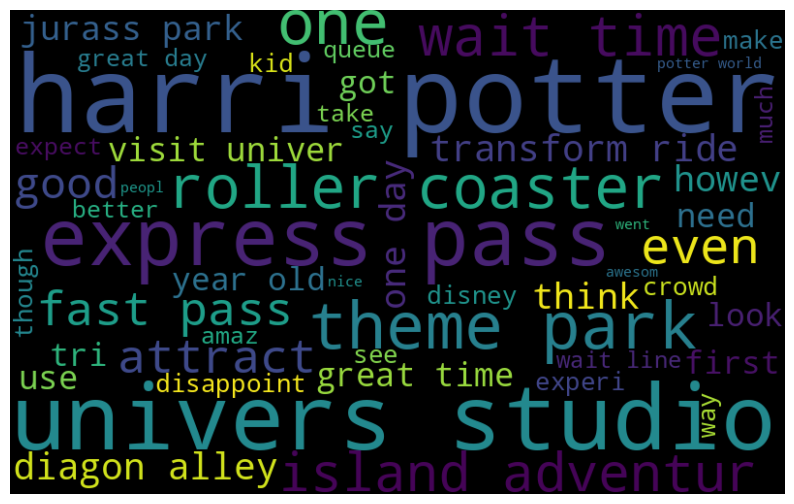

In [29]:
#put frequent words in a mosiac
freq_words = ' '.join([text for text in df['processed_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=1, max_font_size=110, max_words=50).generate(freq_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [30]:
from collections import Counter
from itertools import chain

# split words into lists
v = df['processed_text'].str.split().tolist()
# compute global word frequency
c = Counter(chain.from_iterable(v))
# filter, join, and re-assign
df['processed_text'] = [' '.join([j for j in i if c[j] > 1]) for i in v]

In [31]:
df

,reviewer,rating,written_date,title,review_text,branch,text,processed_text
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,Universal is a complete Disaster - stick with ...,univers complet disast stick disney went unive...
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,Food is hard to get. The food service is horri...,food hard get the food servic horribl review f...
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,Disappointed I booked this vacation mainly to ...,disappoint book vacat main ride hagrid motorcy...
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,My opinion When a person tries the test seat f...,opinion when person tri test seat ride get gre...
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,"The Bourne Stuntacular...MUST SEE Ok, I can't ...",the bourn stuntacular must see stress enough a...
...,...,...,...,...,...,...,...,...
50899,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,I'll Be Back Only If ... This is my first visi...,back onli this first visit univers studio them...
50900,betty l,4.0,"March 29, 2010",Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore,Universal Studios Singapore Experience We fina...,univers studio singapor experi final visit sin...
50901,spoonos65,4.0,"March 28, 2010",Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore,Impressive but not quite finished! We visited ...,impress quit finish visit first week soft open...
50902,HeatSeekerWrexham_UK,4.0,"March 22, 2010",Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore,Small but beautifully marked We visited on the...,small beauti mark visit day soft open ticket s...


In [32]:
y=df.rating
X=df['processed_text']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.10, random_state=1, shuffle=True)
X_train.shape, X_val.shape, y_train.shape,y_val.shape

((45813,), (5091,), (45813,), (5091,))

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))
val_tfIdf = vectorizer_tfidf.transform(X_val.values.astype('U'))

print(vectorizer_tfidf.get_feature_names_out())


['aaa' 'aah' 'aamaz' ... 'zurass' 'zyclon' 'zylon']


In [35]:
train_tfIdf.shape,  val_tfIdf.shape

((45813, 13217), (5091, 13217))

In [36]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB().fit(train_tfIdf, y_train)
print(model.score(train_tfIdf, y_train))

0.6778643616440748


In [37]:
y_pred = model.predict(val_tfIdf)
print(model.score(val_tfIdf, y_val))

0.597132194067963


In [38]:
df_pred = pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df_pred

,Actual,Predicted
44477,4.0,4.0
39610,5.0,2.0
2283,5.0,5.0
15725,5.0,5.0
12522,5.0,5.0
...,...,...
20073,4.0,4.0
42068,5.0,5.0
23124,5.0,5.0
49528,5.0,5.0
